# Исследование данных сервиса аренды самокатов

# Оглавление   
[1 Описание проекта](#description)   
- [1.1 Описание данных](#data)    

[2 Загрузка данных](#downloading)    
- [2.1  Выводы по разделу](#conclusion1)

[3  Предобработка данных](#preparing)       
- [3.1  Выводы по разделу](#conclusion2)

[4  Исследовательский анализ данных](#research)    
- [4.1  Выводы по разделу](#conclusion3)    

[5  Объединение данных](#agregation)    
- [5.1  Выводы по разделу](#conclusion4)  

[6  Подсчёт выручки](#calculation)     
- [6.1  Выводы по разделу](#conclusion5)  

[7  Проверка гипотез](#check)   
- [7.1  Выводы по разделу](#conclusion6)        

[8  Распределения](#distribution)           
- [8.1  Выводы по разделу](#conclusion7)

[9  Результаты исследования](#result)    

### Описание проекта <a id='description'></a>
Целью проекта является поиск точек роста популярного сервиса аренды самокатов GoFast.    
Для реализации исследования были предоставлены данные о некоторых пользователях из нескольких городов, а также об их поездках.     

Краткое описание основных принципов работы сервиса:     
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8 рублей;
стоимость старта (начала поездки) — 
50 рублей;
с подпиской Ultra
абонентская плата — 
199 рублей в месяц;
стоимость одной минуты поездки — 
6 рублей;
стоимость старта — бесплатно.

В ходе исследования данных проанализируем основные показатели поездок и характеристики пользователей, после чего проверим следующие гипотезы, которые могут помочь бизнесу вырасти:

- Пользователи с подпиской тратят больше времени на поездку.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### Описание данных <a id='data'></a>
**Пользователи** — users_go.csv    
- user_id -	уникальный идентификатор пользователя    
- name -	имя пользователя
- age -	возраст    
- city -	город    
- subscription_type -	тип подписки (free, ultra)    

**Поездки** — rides_go.csv    
- user_id -	уникальный идентификатор пользователя    
- distance -	расстояние, которое пользователь проехал в текущей сессии (в метрах)    
- duration -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»    
- date -	дата совершения поездки    

**Подписки** — subscriptions_go.csv    
- subscription_type -	тип подписки    
- minute_price -	стоимость одной минуты поездки по данной подписке    
- start_ride_price -	стоимость начала поездки    
- subscription_fee -	стоимость ежемесячного платежа

### Загрузка данных <a id='downloading'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import random
from math import sqrt
from math import factorial
from scipy.stats import binom, poisson, norm

Начнём с загрузки данных о пользователях

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('users_go.csv')

users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице 1565 записей, названия столбцов и типы данных соответствуют содержащейся информации.

Теперь загрузим данные о поездках

In [4]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    rides = pd.read_csv('rides_go.csv')

rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице 18068 записей, названия столбцов соответствуют содержанию, а тип данных в столбце `date` необходимо привести к формату `datetime`.

На следующем этапе загрузим данные о подписках

In [6]:
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('subscriptions_go.csv')

subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице всего 2 записи, названия столбцов и типы данных соответствуют содержащейся информации

### Вывод: <a id='conclusion1'></a>

Таблицы загрузились без ошибок. В таблице с данными пользователей 1565 записей, таблице с данными о поездках 18068 записей, в таблице с данными о подписках всего 2 записи. Названия столбцов и типы данных соответствуют содержащейся информациии, кроме типа данных в столбце date таблицы `rides_go`, его необходимо будет привести к формату datetime. Полученная выборка данных является достаточной для проведения исследования

### Предобработка данных <a id='preparing'></a>

Начнём предобработку с таблицы rides, первым делом приведём столбец `date` к формату `datetime`

In [8]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

Для проведения исследования создадим столбец с номером месяца на основе столбца `date`

In [9]:
rides['month'] = rides['date'].dt.month

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


Проверим таблицу `rides` на наличие пропусков и дубликатов

In [11]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
rides.duplicated().sum()

0

В таблице `rides` пропуски и дубликаты отсутствуют. Также пропуски и дубликаты отсутствуют в состоящей из двух записей таблице `subscriptions`.

Теперь проверим на наличие пропусков и дубликаторв таблицу users

In [13]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
users.duplicated().sum()

31

В таблице `users` пропуски отсутствуют, но есть 31 дубликат записей. Посмотрим подробнее, есть ли у них общие параметры

In [15]:
duplicate_list = users.query('@users.duplicated() == True')['user_id']
duplicate_users = users[users.duplicated(subset=['user_id'], keep=False)].sort_values(by='user_id')
duplicate_users

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


In [16]:
duplicate_users['city'].unique()

array(['Краснодар', 'Омск', 'Тюмень', 'Москва', 'Пятигорск', 'Сочи',
       'Ростов-на-Дону', 'Екатеринбург'], dtype=object)

Дубликаты никак не связаны конкретным городом, или типом подписки, похоже это технический сбой при формировании данных. Удалим найденные дубликаты, чтобы не вносить искажения в исследование

In [17]:
users = users.drop_duplicates(subset='user_id', keep='first')
users.duplicated().sum()

0

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


После удаления дубликатов в выборке осталось 1534 записи, этого количества достаточно для дальнейшего исследования

#### Вывод: <a id='conclusion2'></a>
Очищенные данные выглядят репрезентативными. В таблице rides столбец date приведён к формату datetime, для проведения исследования создан столбец с номером месяца на основе столбца date.
В таблице rides пропуски и дубликаты отсутствуют. Также пропуски и дубликаты отсутствуют в состоящей из двух записей таблице subscriptions. В таблице users пропуски отсутствуют, но обнаружен 31 дубликат записей. Дубликаты никак не связаны конкретным городом, или типом подписки, похоже на технический сбой при формировании данных. Найденные дубликаты удалены, чтобы не вносить искажения в исследование.
После удаления дубликатов в выборке `users` осталось 1534 записи, этого количества достаточно для дальнейшего исследования

### Исследовательский анализ данных <a id='research'></a>

Рассмотрим распределение пользователей по городам

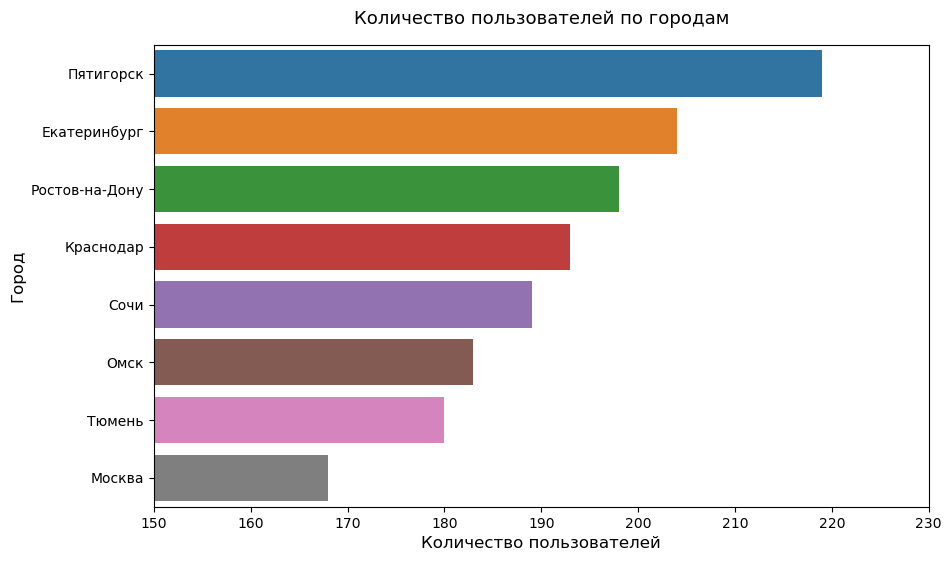

In [19]:
plt.figure(figsize=(10, 6))
city_group = users.groupby('city').agg({'user_id' : 'count'})

city_group = city_group.sort_values(by='user_id', ascending=False) 
city_group.reset_index(inplace=True)
city_group.columns = ['city', 'count']

ax = sns.barplot(y=city_group['city'], x=city_group['count'])
plt.title('Количество пользователей по городам', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Количество пользователей', fontsize=12, color='black')
plt.ylabel('Город', fontsize=12, color='black')
ax.set_xlim(150, 230)
plt.show()

In [20]:
city_group

,city,count
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


Наиболее широко сеть GoFast представлена в южном и сибирском регионе, Москва по количеству пользователей в выборке на последнем месте со 168 пользователями, а лидирует Пятигорск, представленный 219 пользователями.



Теперь рассмотрим соотношение пользователей с подпиской и без подписки

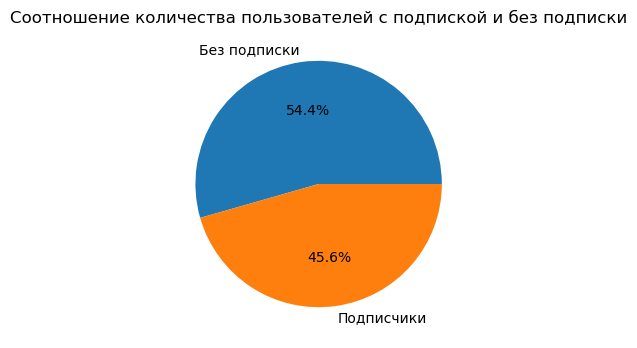

In [21]:
users_group = users.groupby('subscription_type').agg({'user_id' : 'count'})
users_group['kind'] = 0
users_group.loc[users_group.index == 'ultra', 'kind'] = 'Подписчики'
users_group.loc[users_group.index == 'free', 'kind'] = 'Без подписки'
users_group['user_id'].plot(kind='pie', legend=False, figsize=(4, 4), autopct='%.1f%%', labels=users_group['kind'])
plt.title('Соотношение количества пользователей с подпиской и без подписки')
plt.ylabel('', fontsize=13, color='black')
plt.show()

Подписчиков на 10% меньше чем пользователей без подписки, что говорит о хорошей конверсии сервиса.



Определим возрастные категории пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

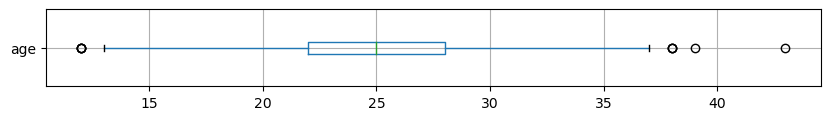

In [22]:
display(users['age'].describe())
users.boxplot(column='age', vert=False, figsize=(10, 1));

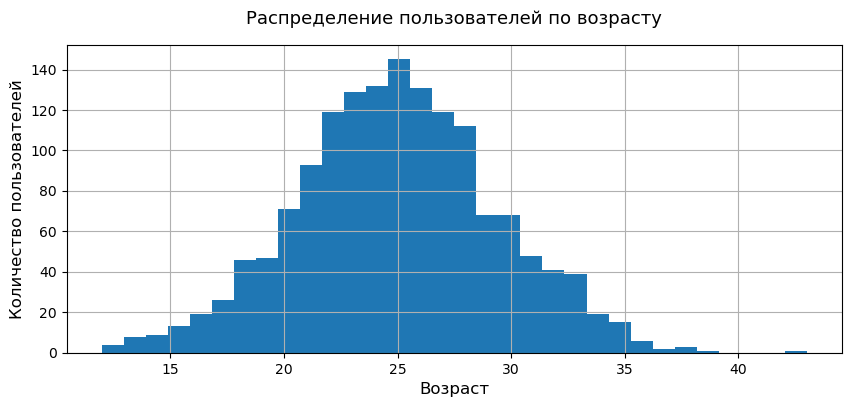

In [23]:
users['age'].plot(kind='hist', grid=True, legend=False, bins=32, figsize=(10, 4))
plt.title('Распределение пользователей по возрасту', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Возраст', fontsize=12, color='black')
plt.ylabel('Количество пользователей', fontsize=12, color='black')
plt.show()

Возраст основной части пользователей от 22 до 28 лет, чаще всего встречается возраст пользователя 25 лет, распределение возрастов похоже на нормальное, поэтому средний возраст также около 25 лет. После 35 лет количество пользователей уже незначительно, а после сорока лет сервисом пользуются единицы. 



Посмотрим на расстояния, преодолеваемые пользователями за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

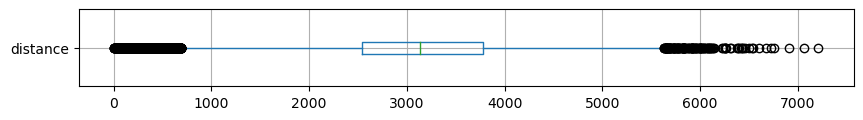

In [24]:
display(rides['distance'].describe())
rides.boxplot(column='distance', vert=False, figsize=(10, 1));

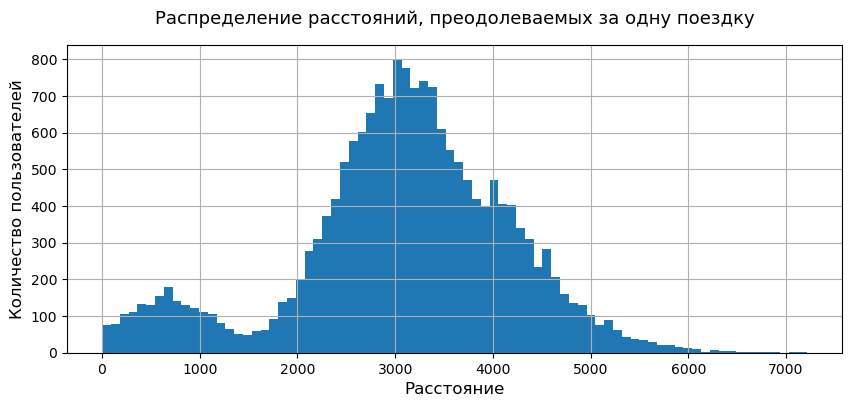

In [25]:
rides['distance'].plot(kind='hist', grid=True, legend=False, bins=80, figsize=(10, 4))
plt.title('Распределение расстояний, преодолеваемых за одну поездку', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Расстояние', fontsize=12, color='black')
plt.ylabel('Количество пользователей', fontsize=12, color='black')
plt.show()

Обычно пользователи проезжают от двух до четырёх километров, наболее часто встречающееся значение равно трём километрам, среднее значение также около трёх километров, поскольку некоторое увеличение количества пользователей, проезжающих больше четырёх километров, компенсируется всплеском количества пользователей проезжающих менее километра.



На следующем этапе рассмотрим продолжительности поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

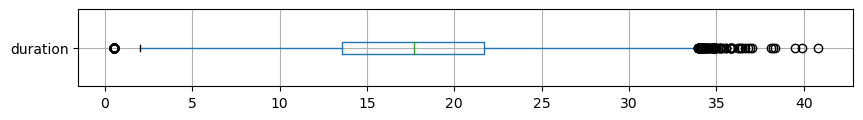

In [26]:
display(rides['duration'].describe())
rides.boxplot(column='duration', vert=False, figsize=(10, 1));

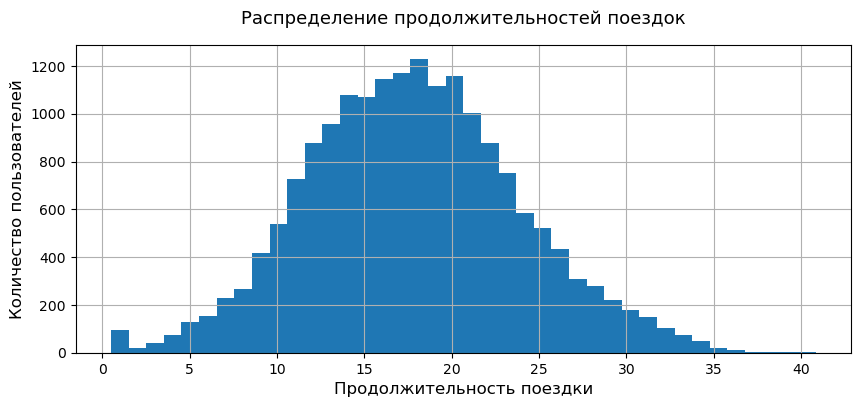

In [27]:
rides['duration'].plot(kind='hist', grid=True, legend=False, bins=40, figsize=(10, 4))
plt.title('Распределение продолжительностей поездок', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Продолжительность поездки', fontsize=12, color='black')
plt.ylabel('Количество пользователей', fontsize=12, color='black')
plt.show()

Основная масса пользователей совершает поездки от 10 до 25 минут, наиболее частое значение около 17 минут, распределение времени похоже на нормальное, без значительных выбросов, поэтому среднее время поездки также составляет около 17 минут. Более 40 минут сервисом пракически не пользуются. Небольшой выброс количества пользователей, у которых длительность поездки составляет менее 1 минуты, может быть следствием каких-то технических проблем с оборудованием.

#### Вывод: <a id='conclusion3'></a>

Наиболее широко сеть GoFast представлена в южных и сибирских регионах, Москва по количеству пользователей на последнем месте, а лидирует Пятигорск. Подписчиков на 10% меньше чем пользователей без подписки, что говорит о хорошей конверсии сервиса.
Возраст основной части пользователей от 22 до 28 лет, чаще всего встречается возраст пользователя 25 лет, распределение возрастов похоже на нормальное, поэтому средний возраст также около 25 лет. После 35 лет количество пользователей уже незначительно, а после сорока лет сервисом пользуются единицы. Обычно пользователи проезжают от двух до четырёх километров, наболее часто встречающееся значение равно трём километрам, среднее значение также около трёх километров, поскольку некоторое увеличение количества пользователей, проезжающих больше четырёх километров, компенсируется всплеском количества пользователей проезжающих менее километра.
Основная масса пользователей совершает поездки от 10 до 25 минут, наиболее частое значение около 17 минут, распределение времени похоже на нормальное, без значительных выбросов, поэтому среднее время поездки также составляет около 17 минут. Более 40 минут сервисом пракически не пользуются. Небольшой выброс количества пользователей, у которых длительность поездки составляет менее 1 минуты, может быть следствием каких-то технических проблем с оборудованием.

###  Объединение данных <a id='agregation'></a>

Объединим данные о пользователях, поездках и подписках в один датафрейм

In [28]:
users_rides = users.merge(rides, on='user_id', how='left')
users_sub_rides = users_rides.merge(subscriptions, on='subscription_type', how='left')
users_sub_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Объединение данных прошло без потерь.



Из полученного датафрейма сделаем выборку пользователей с подпиской

In [29]:
users_sub_rides_ultra = users_sub_rides.query('subscription_type == "ultra"')
users_sub_rides_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


Получена выборка из 6500 пользователей с подпиской.

Теперь сделаем выборку пользователей без подписки

In [30]:
users_sub_rides_free = users_sub_rides.query('subscription_type == "free"')
users_sub_rides_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


Полученная выборка содержит данные 11568 пользователей без подписки.



На следующем этапе посмотрим какие расстояния за одну поездку проезжают представители каждой категории, начнём с подписчиков

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

<Axes: >

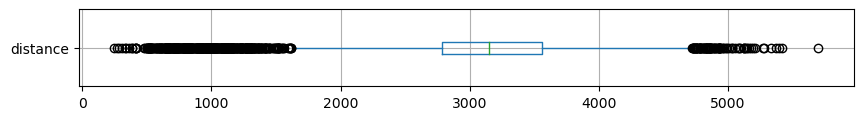

In [31]:
display(users_sub_rides_ultra['distance'].describe())
users_sub_rides_ultra.boxplot(column='distance', vert=False, figsize=(10, 1))

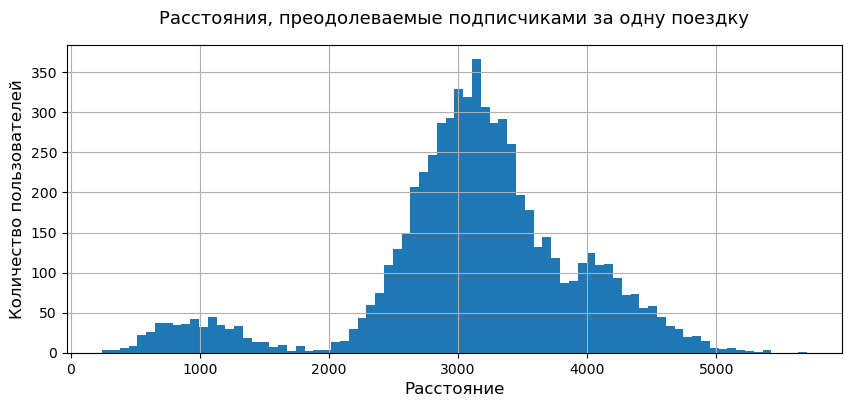

In [32]:
users_sub_rides_ultra['distance'].plot(kind='hist', grid=True, legend=False, bins=80, figsize=(10, 4))
plt.title('Расстояния, преодолеваемые подписчиками за одну поездку', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Расстояние', fontsize=12, color='black')
plt.ylabel('Количество пользователей', fontsize=12, color='black')
plt.show()

Подписчики сервиса проезжают в среднем 3115 метров при небольшом стандартном отклонении окло 800 метров. Прослеживается небольшая группа пользователей, проезжающихз за поездку около 1000 метров.

Теперь рассмотрим поездки пользователей без подписки

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

<Axes: >

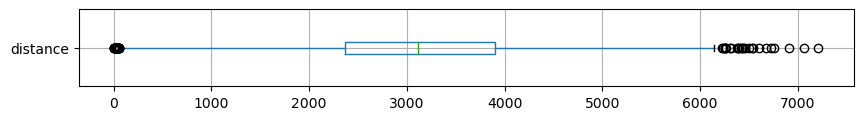

In [33]:
display(users_sub_rides_free['distance'].describe())
users_sub_rides_free.boxplot(column='distance', vert=False, figsize=(10, 1))

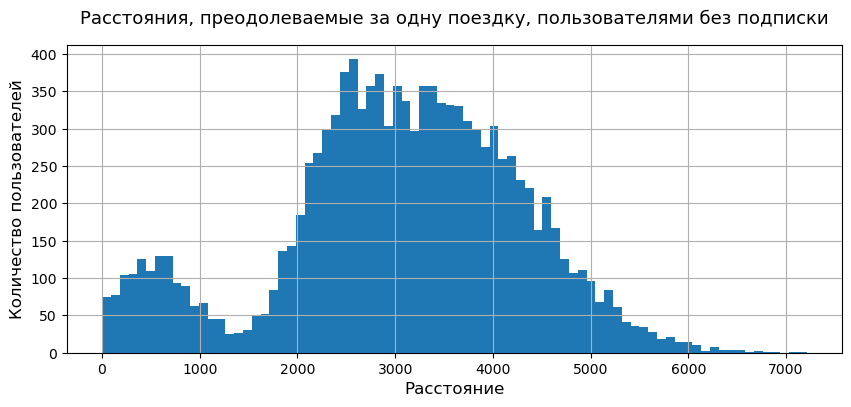

In [34]:
users_sub_rides_free['distance'].plot(kind='hist', grid=True, legend=False, bins=80, figsize=(10, 4))
plt.title('Расстояния, преодолеваемые за одну поездку, пользователями без подписки', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Расстояние', fontsize=12, color='black')
plt.ylabel('Количество пользователей', fontsize=12, color='black')
plt.show()

Пользователи без подписки в среднем проезжают чуть меньше - 3045 метров и демонстрируют большее стандартное отклонение - 1246 метров. Они чаще проезжают расстояния больше 4000 метров, но среднее значение получается ниже из-за большого количества поездок менее 1000 метров.

Далее рассмотрим продолжительности поездок, начнём с подписчиков

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

<Axes: >

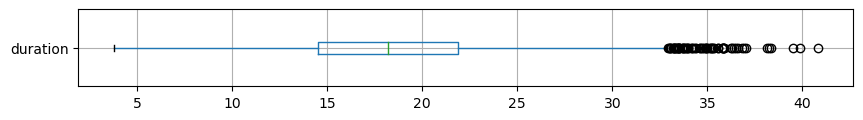

In [35]:
display(users_sub_rides_ultra['duration'].describe())
users_sub_rides_ultra.boxplot(column='duration', vert=False, figsize=(10, 1))

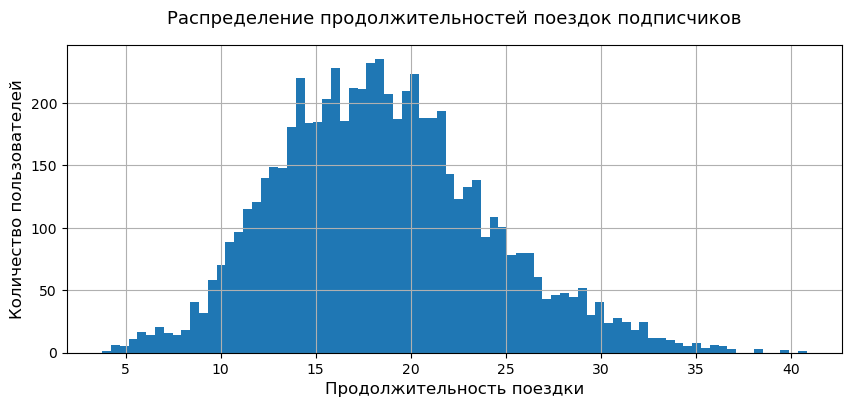

In [36]:
users_sub_rides_ultra['duration'].plot(kind='hist', grid=True, legend=False, bins=80, figsize=(10, 4))
plt.title('Распределение продолжительностей поездок подписчиков', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Продолжительность поездки', fontsize=12, color='black')
plt.ylabel('Количество пользователей', fontsize=12, color='black')
plt.show()

Продолжительность поездки подписчиков составляет в среденем 18 минут, большинство тратят на поездку от 13 до 23 минут, распределение значений похоже на нормальное, без выбросов.

Теперь посмотрим на время поездки пользователей без подписки

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

<Axes: >

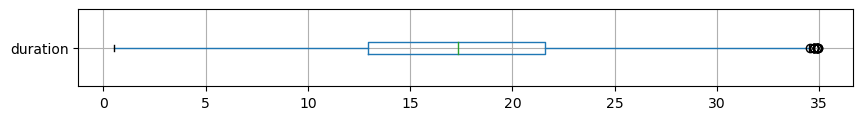

In [37]:
display(users_sub_rides_free['duration'].describe())
users_sub_rides_free.boxplot(column='duration', vert=False, figsize=(10, 1))

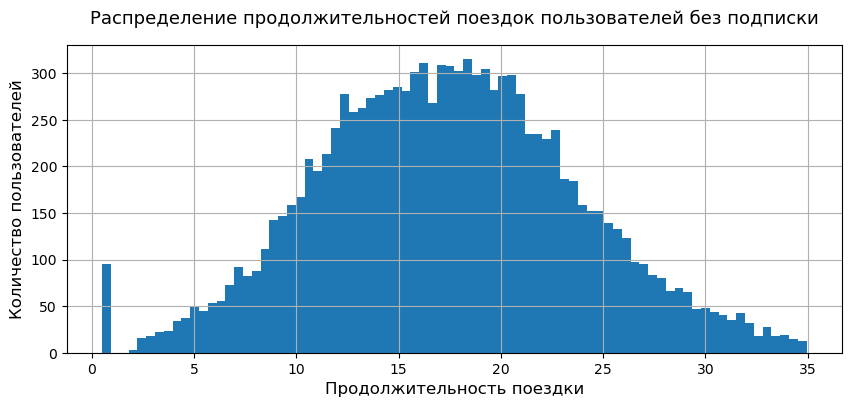

In [38]:
users_sub_rides_free['duration'].plot(kind='hist', grid=True, legend=False, bins=80, figsize=(10, 4))
plt.title('Распределение продолжительностей поездок пользователей без подписки', loc ='center', pad = 15, fontsize=13, \
             color='black', backgroundcolor='white', fontstyle='normal')
plt.xlabel('Продолжительность поездки', fontsize=12, color='black')
plt.ylabel('Количество пользователей', fontsize=12, color='black')
plt.show()

Пользователи без подписки тратят на поездку чуть меньше - 17 минут и показывают большее стандартное отклонение времени поездки, которое составляет 6 минут. Выброс в значениях времени поездки менее минуты наблюдается только среди этой категории пользователей

#### Вывод: <a id='conclusion4'></a>

Объединение данных о пользователях, поездках и подписках прошло без потерь. Из полученного датафрейма сделаны выборки из 6500 пользователей с подпиской и 11568 пользователей без подписки.    

Подписчики сервиса проезжают в среднем 3115 метров при небольшом стандартном отклонении окло 800 метров. Прослеживается небольшая группа пользователей, проезжающихз за поездку около 1000 метров. Пользователи без подписки в среднем проезжают чуть меньше - 3045 метров и демонстрируют большее стандартное отклонение - 1246 метров. Они чаще преодолевают расстояния больше 4000 метров, но среднее значение получается ниже из-за большого количества поездок менее 1000 метров.    

Продолжительность поездки подписчиков составляет в среденем 18 минут, большинство тратят на поездку от 13 до 23 минут, распределение значений похоже на нормальное, без выбросов. Пользователи без подписки тратят на поездку чуть меньше - 17 минут и показывают большее стандартное отклонение времени поездки, которое составляет 6 минут. Выброс в значениях времени поездки менее минуты наблюдается только среди этой категории пользователей.

### Подсчёт выручки <a id='calculation'></a>

Для подсчета выручки создадим таблицу с агрегированными данными о поездках на основе датафрейма `users_sub_rides` с объединёнными данными. Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. К полученным данным добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для подсчёта стоимости, округлим продолжительность каждой поездки в каждой строке исходного датафрейма до следующего целого числа.

In [39]:
users_sub_rides['duration'] = np.ceil(users_sub_rides['duration'])
users_by_month = (users_sub_rides.pivot_table(index=['month', 'user_id'], \
                    values=['distance', 'duration', 'date', 'minute_price', 'start_ride_price', 'subscription_fee'], 
                    aggfunc={'distance' : 'sum', 'duration' : 'sum', 'date' : 'count', 'minute_price' : 'first',
                            'start_ride_price' : 'first', 'subscription_fee' : 'first'}))

users_by_month.columns = ['rides_count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']
users_by_month['revenue'] = (users_by_month['start_ride_price'] * users_by_month['rides_count'] + users_by_month['minute_price']
                             * users_by_month['duration'] + users_by_month['subscription_fee'])
users_by_month.head()

rides_count     distance  duration  minute_price  \
month user_id                                                     
1     1                  2  7027.511294      42.0             6   
      3                  1  3061.777147      13.0             6   
      5                  1  3914.646990      13.0             6   
      7                  2  6478.080979      28.0             6   
      12                 1  3577.151148      33.0             6   

               start_ride_price  subscription_fee  revenue  
month user_id                                               
1     1                       0               199    451.0  
      3                       0               199    277.0  
      5                       0               199    277.0  
      7                       0               199    367.0  
      12                      0               199    397.0

#### Вывод: <a id='conclusion5'></a>

Создан датафрейм с информацией о суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц. К полученным данным добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Расчётные данные готовы для дальнейшего анализа.

### Проверка гипотез <a id='check'></a>

Первой проверим гипотезу что пользователи с подпиской тратят больше времени на поездки. Для проверки используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.    

- Нулевая гипотеза: пользователи с подпиской тратят равное количество времени на поездку с пользователями без подписки.    
- Альтернативная гипотеза: Подписчики тратят больше времени на поездку, чем пользователи без подписки.

In [40]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
first_group_total = users_sub_rides_ultra['duration']

# траты второй группы пользователей (без подписки)
second_group_total = users_sub_rides_free['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group_total, second_group_total, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Проверка односторонней гипотезы показала, что пользователи с подпиской тратят больше времени на поездки, такие пользователи могут быть «выгоднее» для компании.

Далее проверим, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, поскольку такое расстояние оптимально с точки зрения износа самоката.    
Нулевая гипотеза: пользователи с подпиской проезжают за одну поездку расстояние равное 3130 метров.    
Альтернативная гипотеза: пользователи с подпиской проезжают за одну поездку больше 3130 метров.

In [41]:
from scipy import stats as st
import numpy as np
import pandas as pd

first_group_total = users_sub_rides_ultra['distance']
interested_value = 3130# оптимальное расстояние

alpha = 0.05# укажите уровень статистической значимости

results = st.ttest_1samp(
    first_group_total, 
    interested_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: среднее расстояние значимо больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние не превышает оптимального')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние не превышает оптимального


Проверка гипотезы показала, что с вероятностью 92% среднее расстояние поездки пользователя с подпиской не превышает оптимального расстояния в 3130 метров. Учитывая также, что пользователи с подпиской тратят больше времени на поездки, прибыль от этой категории пользователей может быть выше прибыли пользователей без подписки. Чтобы подтвердить это, проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Нулевая гипотеза: помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.    
Альтернативная гипотеза: помесячная выручка от подписчиков больше помесячной выручки от пользователей без подписки.

In [42]:
# задаём уровень значимости
alpha = 0.05

# выручка первой группы пользователей (с подпиской)
first_group_total = users_by_month.query('subscription_fee > 0')['revenue']

# выручка второй группы пользователей (без подписки)
second_group_total = users_by_month.query('subscription_fee == 0')['revenue']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group_total, second_group_total, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается, помесячная выручка больше у пользователей с подпиской. Они тратят больше времени на поездки, при этом среднее расстояние, преодолеваемое за одну поездку, не превышает оптимального. Совокупность данных факторов может обеспечить рост прибыли при увеличении конверсии пользователей сервиса в категорию подписчиков

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Для проверки этой гипотезы применим метод scipy.stats.ttest_rel, анализирующий равенство среднего генеральной совокупности для зависимых (парных) выборок в Python

#### Вывод: <a id='conclusion6'></a>

Проверка односторонней гипотезы о том, что пользователи с подпиской тратят больше времени на поездки показала,
что у подписчиков выше вероятность получить распределения больших значений длительности поездки чем у пользователей без подписки, следовательно пользователи с подпиской могут быть «выгоднее» для компании.

Проверка гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров показала, что с вероятностью 92% среднее расстояние поездки подписчика не превышает оптимального. Учитывая также, что пользователи с подпиской тратят больше времени на поездки, прибыль от этой категории пользователей может быть выше прибыли пользователей без подписки. Чтобы подтвердить это, проверили гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. По результатам проверки гипотезы выяснили, что помесячная выручка оказалась выше у пользователей с подпиской. Этот фактор в совокупности с тем, что подписчики тратят больше времени на поездки, и среднее расстояние, преодолеваемое ими за одну поездку, не превышает оптимального, может обеспечить рост прибыли при увеличении конверсии пользователей сервиса в категорию подписчиков.    

Для проверки гипотезы о том, что после обновления сервера, с которыми взаимодействует мобильное приложение, количество обращений в техподдержку значимо снизилось, необходим файл, содержащий для каждого пользователя данные о количестве обращений до обновления и после него. К этим данным нужно применить метод `scipy.stats.ttest_rel`, анализирующий равенство среднего генеральной совокупности для зависимых (парных) выборок в Python

### Распределения <a id='distribution'></a>

Для проведения акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, выясним какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. 

Для первичной оценки построим биномиальное распределение, которое описывает указанную ситуацию для тысячи розданных промокодов

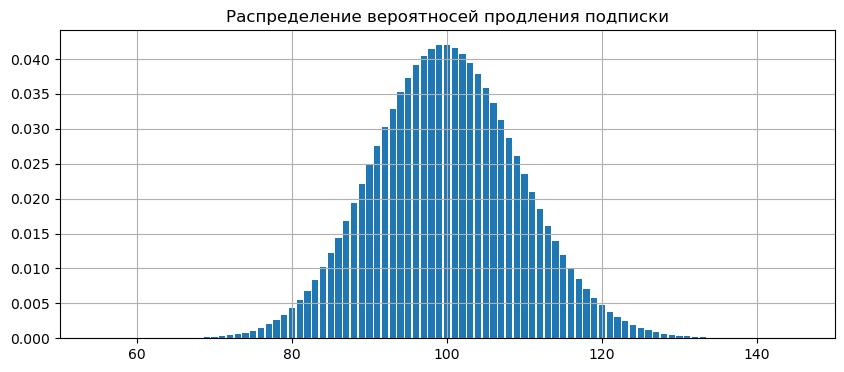

In [43]:
p = 0.1 # вероятность продления подписки
n = 1000 # количество промокодов, котрые нужно разослать

distr = [] # список в котором будем хранить значения распределения

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)

# строим гистограмму распределения вероятностей
fig, ax = plt.subplots(figsize=(10, 4))
plt.bar(range(0, n+1), distr)
ax.set_xlim(50, 150)
plt.title('Распределение вероятносей продления подписки')
plt.grid()
plt.xticks(rotation=0, ha='center')
plt.show()

Подберем подходящее значение количества промокодов, чтобы вероятность не выполнить план была примерно 5 %

In [44]:
# задаём параметры биномиального распределения
n = 1000
p = 0.1

result = 1
while result >= 0.05:
    n += 1
    # задаём параметры нормального распределения равными
    # мат.ожиданию и дисперсии биномиального распределения
    mu = n * p
    sigma = sqrt(n * p * (1 - p))
    # задаём нормальное распределение
    distr = st.norm(mu, sigma) 
    # считаем вероятность хвоста слева от 100
    result = distr.cdf(100)
    
print(f'При раздаче {n} промокодов, вероятность не выполнить план будет примерно {result:.1%}')

При раздаче 1169 промокодов, вероятность не выполнить план будет примерно 5.0%


Чтобы вероятность не выполнить план была около 5%, необходимо раздать минимум 1169 промокодов. Посмотрим как отображается на графике плотность вероятности не выполнить план при раздаче 1169 промокодов.

In [45]:
# для визуализации нормального распределения зададим функцию, 
#которая выдаёт <num> чисел, равномерно распределённых от <start> до <stop>
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

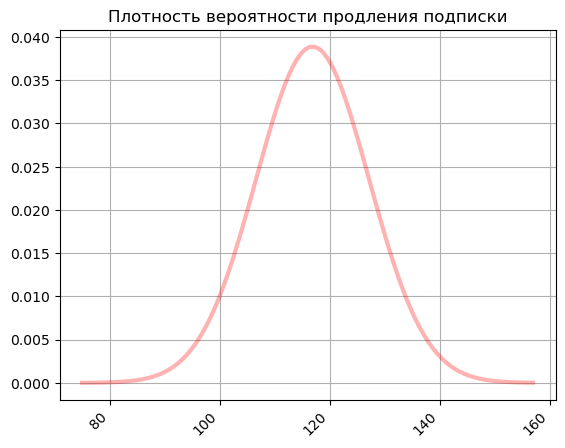

In [46]:
# границы промежутка, в котором будем строить аппроксимацию от mu минус 4 ст.отклонения бином.распределения
# до mu плюс 4 ст.отклонения бином.распределения (там, где вероятности значений почти не равны нулю)
# параметры нормального распределения возъмём из предыдущего расчёта
left = int(mu - 4 * sigma)
right = int(mu + 4 * sigma)
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax = plt.subplot()
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3)
plt.title('Плотность вероятности продления подписки')
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

Из графика видим, что при раздаче 1169 промокодов с большей долей вероятности размер группы пользователей, продливших подписку, будет превышать сто человек, расчётная вероятность не выполнить составляет около 5%.

Отдел маркетинга планирует разослать 1 млн уведомлений, известно, что уведомления открывают около 40% получивших клиентов. Построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей. 
Для 1 млн уведомлений график строится долго, поэтому будем использовать аппрокисмацию биномиального распределнеия нормальным

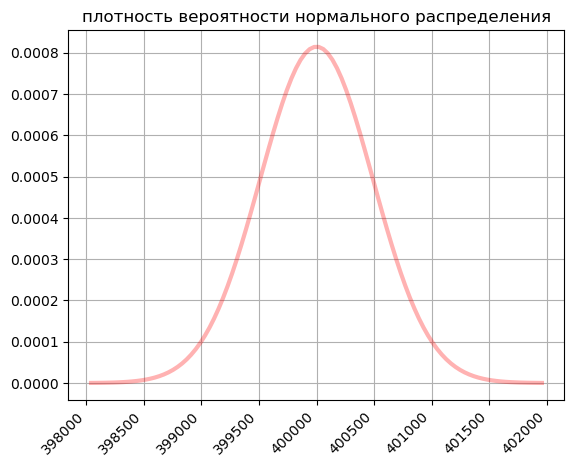

Условие аппроксимации выполняется


In [47]:
p = 0.4 # вероятность просмотра уведомления
n = 1000000 # количество разосланных уведомлений

# границы промежутка, в котором будем строить аппроксимацию от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax = plt.subplot()
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3)
plt.title('плотность вероятности нормального распределения')
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

# выводим, выполняется ли наше условие аппроксимации: лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие аппроксимации выполняется')
else:
    print('Условие аппроксимации не выполняется')

Аппроксимация выполнена точно, график показывает, что с большой долей вероятности уведомление откроют более 399500 человек, посчитаем, с какой вероятностью уведомление откроют менее 399500 пользователей

In [48]:
# используем параметры нормального распределения из предыдущих расчётов
# задаём нормальное распределение
distr = st.norm(mu, sigma) 
result = distr.cdf(399500)
print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет {result:.1%}')

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет 15.4%


При рассылке 1 млн push-уведомлений, с вероятностью 15.4%, уведомление откроют менее 399500 пользователей.

#### Вывод: <a id='conclusion7'></a>

Для проведения акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, минимальное количество промокодов, которые нужно разослать, чтобы вероятность не выполнить план была около 5%, составляет 1169.

При рассылке отделом маркетинга 1 млн push-уведомлений, с помощью аппрокисмации биномиального распределнеия нормальным выяснили, что с большой долей вероятности уведомление откроют более 399500 человек, вероятность, что уведомление откроет меньшее количество пользователей составляет 15.4%

### Результаты исследования <a id='result'></a>

Полученные данные были загружены без ошибок, в таблице с информацией о пользователях 1565 записей, таблица с данными о поездках содержит 18068 записей, в таблице с данными о подписках всего 2 записи. Тип данных в столбце `date` таблицы `rides_go` был приведён к формату datetime. Названия столбцов и типы данных соответствуют содержащейся информациии. Полученная выборка данных является достаточной для проведения исследования.

В ходе предобработки данных для проведения исследования создан столбец с номером месяца на основе столбца `date`.
Пропуски данных отсутствовали во всех таблицах. Дубликаты обнаружены только в таблице `users`, они не связаны с конкретным городом, или типом подписки, похоже на технический сбой при формировании данных. 31 найденный дубликат удален, чтобы не вносить искажения в исследование. Очищенные данные выглядят репрезентативными, после удаления дубликатов в выборке `users` осталось 1534 записи.

Исследовательский анализ показал, что наиболее широко сеть GoFast представлена в южных и сибирских регионах, Москва по количеству пользователей на последнем месте, а лидирует Пятигорск. Подписчиков на 10% меньше чем пользователей без подписки, что говорит о хорошей конверсии сервиса.
Возраст основной части пользователей от 22 до 28 лет, чаще всего встречается возраст пользователя 25 лет, распределение возрастов похоже на нормальное, поэтому средний возраст также около 25 лет. После 35 лет количество пользователей уже незначительно, а после сорока лет сервисом пользуются единицы. Обычно пользователи проезжают от двух до четырёх километров, наболее часто встречающееся значение равно трём километрам, среднее значение также около трёх километров, поскольку некоторое увеличение количества пользователей, проезжающих больше четырёх километров, компенсируется всплеском количества пользователей проезжающих менее километра.
Основная масса пользователей совершает поездки от 10 до 25 минут, наиболее частое значение около 17 минут, распределение времени похоже на нормальное, без значительных выбросов, поэтому среднее время поездки также составляет около 17 минут. Более 40 минут самокатами пракически не пользуются. Небольшой выброс количества пользователей, у которых длительность поездки составляет менее 1 минуты, может быть следствием каких-то технических проблем с оборудованием.

Объединение данных о пользователях, поездках и подписках прошло без потерь. Из полученного датафрейма сделаны выборки из 6500 подпичиков сервиса и 11568 пользователей без подписки.    

В ходе исследования объединённых данных установили, что подписчики сервиса проезжают в среднем 3115 метров при небольшом стандартном отклонении окло 800 метров. Прослеживается небольшая группа пользователей, проезжающихз за поездку около 1000 метров. Пользователи без подписки в среднем проезжают чуть меньше - 3045 метров и демонстрируют большее стандартное отклонение - 1246 метров. Они чаще преодолевают расстояния больше 4000 метров, но среднее значение получается ниже из-за большого количества поездок менее 1000 метров.    
Продолжительность поездки подписчиков составляет в среденем 18 минут, большинство тратят на поездку от 13 до 23 минут, распределение значений похоже на нормальное, без выбросов. Пользователи без подписки тратят на поездку чуть меньше - 17 минут и показывают большее стандартное отклонение времени поездки, которое составляет 6 минут. Выброс в значениях времени поездки менее минуты наблюдается только среди этой категории пользователей.

Для проверки гипотез создан датафрейм с информацией о суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц. К полученным данным добавлен столбец с рассчитанной помесячной выручкой, которую принёс каждый пользователь.

Проверка односторонней гипотезы о том, что пользователи с подпиской тратят больше времени на поездку, проведённая с использованием метода ttest_ind для исходных данных о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки показала, что вероятность получить распределения более высоких значений длительности поездки у подписчиков большая, чем у пользователей без подписки, следовательно пользователи с подпиской могут быть «выгоднее» для компании.

Проверка гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров показала, что с вероятностью 92% среднее расстояние поездки подписчика не превышает оптимального. Учитывая также, что пользователи с подпиской тратят больше времени на поездки, прибыль от этой категории пользователей может быть выше прибыли пользователей без подписки.    
Чтобы подтвердить это, проверили гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. По результатам проверки установили, что вероятность получения большей помесячной выручки у подписчиков выше, чем у пользователей без подписки. Этот фактор в совокупности с тем, что подписчики тратят больше времени на поездки, и среднее расстояние, преодолеваемое ими за одну поездку, не превышает оптимального, может обеспечить рост прибыли при увеличении конверсии пользователей сервиса в категорию подписчиков.    

Для проверки гипотезы о том, что после обновления сервера, с которыми взаимодействует мобильное приложение, количество обращений в техподдержку значимо снизилось, необходим файл, содержащий для каждого пользователя данные о количестве обращений до обновления и после него. К этим данным нужно применить метод `scipy.stats.ttest_rel`, анализирующий равенство среднего генеральной совокупности для зависимых (парных) выборок в Python

Для проведения акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, минимальное количество промокодов, которые нужно разослать, чтобы вероятность не выполнить план была около 5%, составляет 1169.

При рассылке отделом маркетинга 1 млн push-уведомлений, с помощью аппрокисмации биномиального распределнеия нормальным выяснили, что с большой долей вероятности уведомление откроют более 399500 человек, вероятность, что уведомление откроет меньшее количество пользователей составляет 15.4%

#### Вывод:

На основе полученных данных установили, что сервис наиболее востребован среди пользователей от 22 до 28 лет, тратящих на поездку около 17 минут и проезжающих в среднем 3 километра. При проведении рекламной компании учёт таких параметров целевой аудитории повысит эффективность поиска и привлечения новых клиентов. Также точкой роста может быть привлечение пользователей без подписки в категорию подписчиков. На момент исследования, подписчиков было на 10% меньше пользователей без подписки, что с одной стороны говорит о хорошей конверсии, но и показывает наличие большого ресурса для роста, поскольку проверка гипотез подтвердила, что пользователи с подпиской тратят больше времени на поездку, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального и помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Следствием этих факторов может стать получение большей прибыли при увеличении конверсии пользователей без подписки в подписчиков.    
Проводя маркетинговую компанию, следует учитывать следующие показатели, полученные в ходе исследования:    
При рассылке 1 млн push-уведомлений, вероятность того, что уведомление откроют менее 399500 человек составляет 15.4%.    
Для того, чтобы минимум 100 клиентов продлили полученную по акции бесплатную подписку с вероятностью 95%, необходимо раздать 1169 промокодов.